# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [92]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [93]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print(f"City not found. Skipping...{city}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | tarko-sale
Processing Record 3 of Set 1 | kerikeri
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | tura
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | kraljevo
Processing Record 9 of Set 1 | katsuura
Processing Record 10 of Set 1 | bilibino
Processing Record 11 of Set 1 | lompoc
Processing Record 12 of Set 1 | onsong
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | bich'vinta
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | selfoss
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...taiohae
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | papatowai
Processing Record 22 of Set 1 |

In [94]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [95]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,6.05,61,100,3.09,US,1712373407
1,tarko-sale,64.9225,77.7850,-15.26,79,100,7.02,RU,1712373407
2,kerikeri,-35.2268,173.9474,19.36,76,64,4.21,NZ,1712373407
3,kodiak,57.7900,-152.4072,3.73,56,0,8.23,US,1712373408
4,tura,25.5198,90.2201,28.56,62,8,3.68,IN,1712373135


In [96]:
#Added the variable csv_path due to several issues with the path
csv_path = "/Users/kevindorado/Desktop/Challenge 6/output_data/cities.csv"

# Export the City_Data into a csv
city_data_df.to_csv(csv_path, index_label="City_ID")


In [97]:
# Read saved data
city_data_df = pd.read_csv(csv_path, index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,6.05,61,100,3.09,US,1712373407
1,tarko-sale,64.9225,77.7850,-15.26,79,100,7.02,RU,1712373407
2,kerikeri,-35.2268,173.9474,19.36,76,64,4.21,NZ,1712373407
3,kodiak,57.7900,-152.4072,3.73,56,0,8.23,US,1712373408
4,tura,25.5198,90.2201,28.56,62,8,3.68,IN,1712373135


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

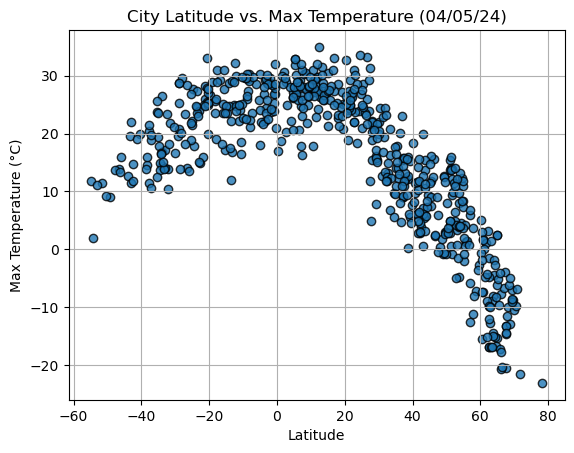

In [98]:
import os
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], edgecolors="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
#With the use of the .time.strftime I added the actual date
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (°C)")
plt.xlabel("Latitude")
plt.grid(True)

#Added two new variables called image path and csv_directory due to problems with the path join
csv_directory= os.path.dirname(csv_path)
image_path=os.path.join(csv_directory, "Fig1.png")

# Save the figure
plt.savefig(image_path)

# Show plot
plt.show()

#### Latitude Vs. Humidity

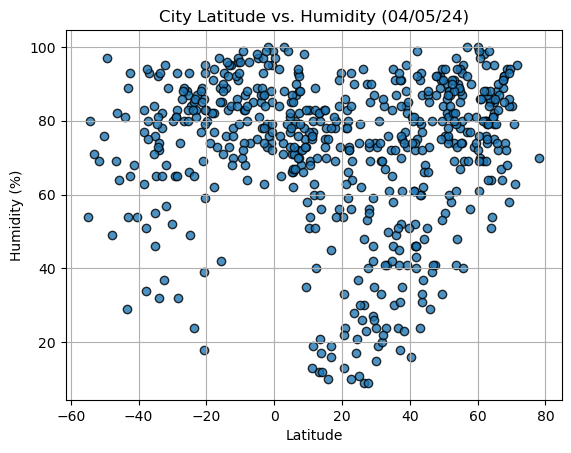

In [99]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

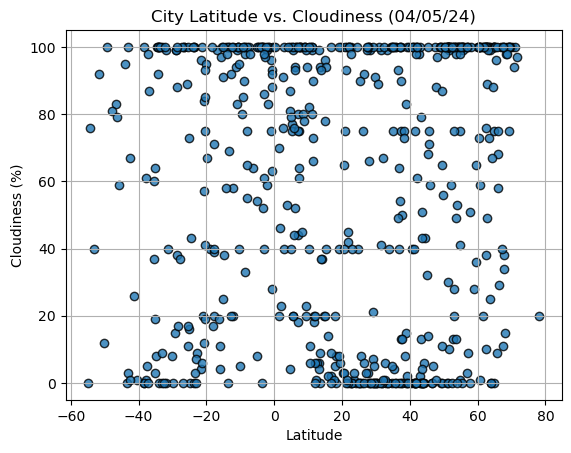

In [100]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='black', linewidth=1, marker='o', alpha=0.8, label='Cities')


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%x')})")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

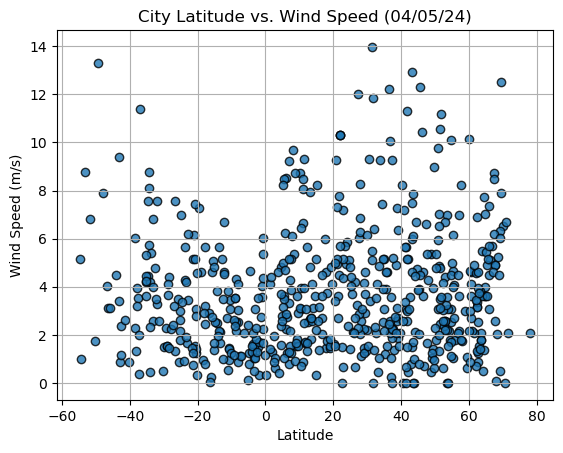

In [101]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='black', linewidth=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%x')})")
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [102]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_values = x_values * slope + intercept
    line_equation= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_squared = rvalue**2
    r_value= rvalue
    print(f"The r-squared value is: {r_squared}")
    print(f"The r-value is: {r_value}")

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regression_values,"r-")

#I add the line equation in the graph with .annotate function
    plt.annotate(line_equation, text_coordinates, fontsize=15, color="red")

    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)

    plt.show()


In [103]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,6.05,61,100,3.09,US,1712373407
1,tarko-sale,64.9225,77.7850,-15.26,79,100,7.02,RU,1712373407
3,kodiak,57.7900,-152.4072,3.73,56,0,8.23,US,1712373408
4,tura,25.5198,90.2201,28.56,62,8,3.68,IN,1712373135
7,kraljevo,43.7258,20.6894,6.00,87,0,0.00,RS,1712373179


In [104]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,kerikeri,-35.2268,173.9474,19.36,76,64,4.21,NZ,1712373407
5,ushuaia,-54.8000,-68.3000,11.81,54,0,5.14,AR,1712373203
6,port-aux-francais,-49.3500,70.2167,8.98,97,100,13.29,TF,1712373408
12,edinburgh of the seven seas,-37.0676,-12.3116,18.82,93,87,11.38,SH,1712373409
13,adamstown,-25.0660,-130.1015,22.13,66,73,2.62,PN,1712373410


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.8205607100315279
The r-value is: -0.9058480612285528


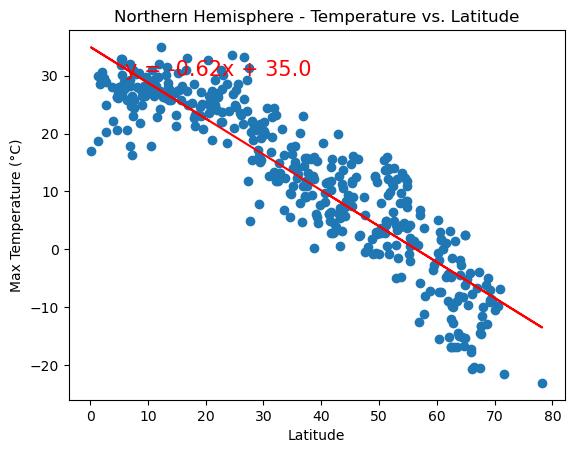

In [105]:
# Linear regression on Northern Hemisphere

plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 
                       'Northern Hemisphere - Temperature vs. Latitude', 
                       'Max Temperature (°C)', (6, 30))

The r-squared value is: 0.4676434515806239
The r-value is: 0.683844610697945


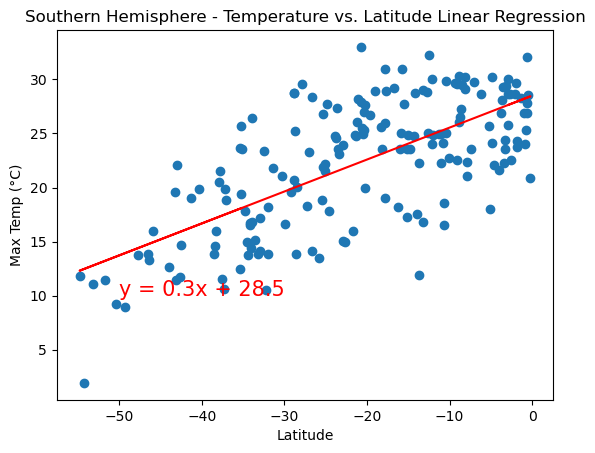

In [106]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],
                       'Southern Hemisphere - Temperature vs. Latitude Linear Regression',
                       'Max Temp (°C)', (-50, 10))


**Discussion about the linear relationship:** 

In the first graph of the northern hemisphere we can see that the regression line has a negative slope, indicating that there is a decreasing trend of the maximum temperature as the latitude increases. This is consistent with the assumptions made at the start of the challenge that as you move away from the equator toward the north pole, temperatures tend to decrease.

In the other hand, in the second graph of the southern hemisphere we can see that the regression line has a positive slope which suggests that maximum temperatures increase as we approach the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.04609834781940573
The r-value is: 0.21470525801527482


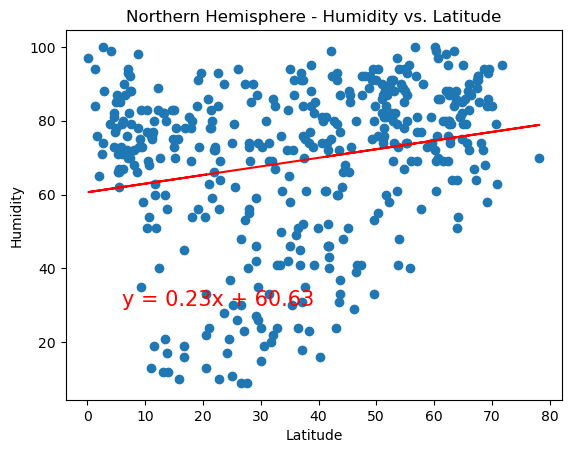

In [107]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 
                       'Northern Hemisphere - Humidity vs. Latitude', 
                       'Humidity', (6, 30))

The r-squared value is: 0.1197851407750006
The r-value is: 0.3460998999927631


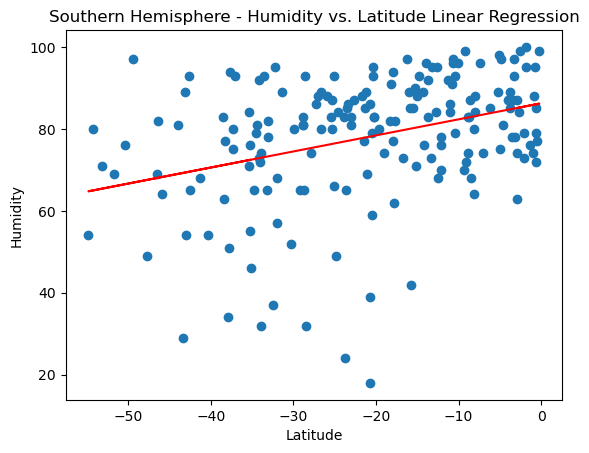

In [108]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],
                       'Southern Hemisphere - Humidity vs. Latitude Linear Regression',
                       'Humidity',(-50,10))

**Discussion about the linear relationship:**
 The graphs shows a weak relationship between latitude and humidity for both hemispheres. In the Northern Hemisphere, humidity increases slightly as latitude increases, which is reflected in a moderate R-squared value. In the Southern Hemisphere, the increase in humidity with latitude is even less pronounced, as indicated by a lower R-squared value. Therefore, this suggests that latitude alone is not a strong or adequate predictor of humidity and that therefore there are other factors that contribute to regional humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.021462132327013595
The r-value is: 0.14649959838516144


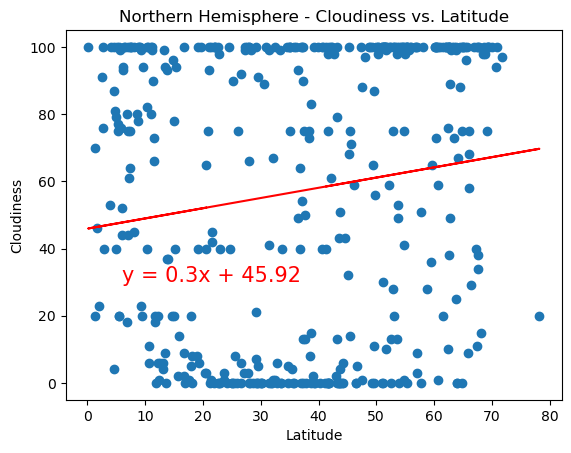

In [109]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 
                       'Northern Hemisphere - Cloudiness vs. Latitude', 
                       'Cloudiness', (6, 30))

The r-squared value is: 0.08204539491120207
The r-value is: 0.28643567325178276


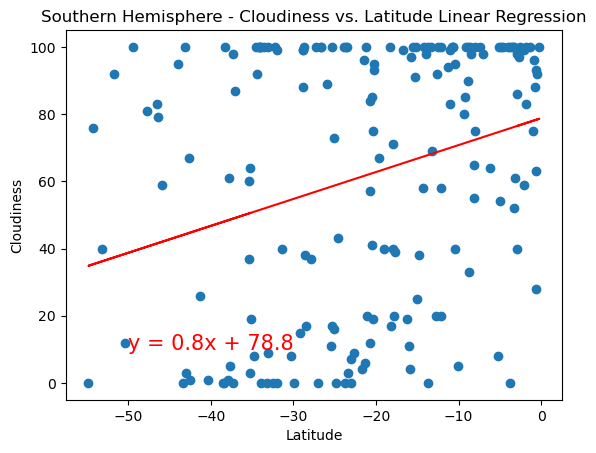

In [110]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],
                       'Southern Hemisphere - Cloudiness vs. Latitude Linear Regression',
                       'Cloudiness',(-50,10))

**Discussion about the linear relationship:**
 Looking at the linear regression plots of cloudiness versus latitude in both hemispheres, we can conclude that there is a positive relationship between latitude and cloudiness in both cases. This indicates that as we move north of the equator in the Northern Hemisphere, and south of the equator in the Southern Hemisphere, there is a slight increase in cloudiness. However, the relationship does not appear to be very significally, as the dispersion of the data is quite wide and the r-squared value is not very high in either case, suggesting that latitude alone is not a strong predictor of cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.0007885573982504317
The r-value is: 0.028081264185403614


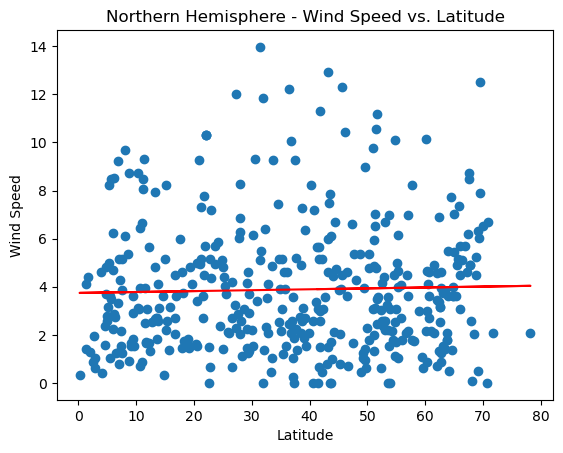

In [111]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 
                       'Northern Hemisphere - Wind Speed vs. Latitude', 
                       'Wind Speed', (6, 30))

The r-squared value is: 0.12046510651117129
The r-value is: -0.34708083570138426


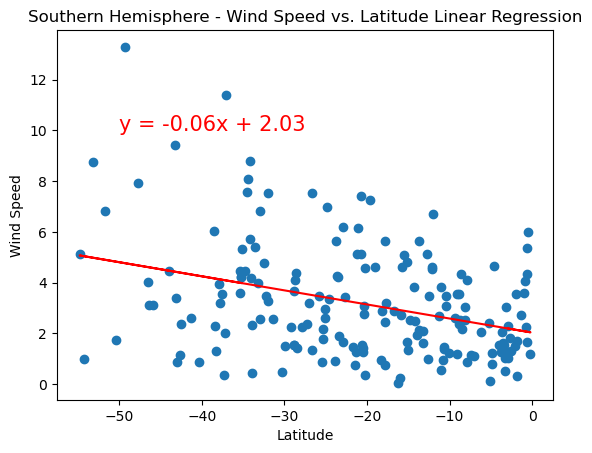

In [112]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],
                       'Southern Hemisphere - Wind Speed vs. Latitude Linear Regression',
                       'Wind Speed',(-50,10))

**Discussion about the linear relationship:**
 The graphs show the relationship between latitude and wind speed for both hemispheres. In the Northern Hemisphere, there is a slightly negative relationship, indicating that as latitude increases, wind speeds tend to decrease very slightly. In the Southern Hemisphere, the trend is slightly positive, suggesting that as latitude approaches the equator, wind speeds tend to increase minimally as well.